# Ethereum Forcasting

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [2]:
df = pd.read_csv('../datasets/EthereumHistoricalData.csv', parse_dates=[0], index_col=0)

In [3]:
df.sort_index(axis=0, inplace=True)

In [4]:
df

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2016-03-10,11.75,11.20,11.85,11.07,0.00K,4.91%
2016-03-11,11.95,11.75,11.95,11.75,0.18K,1.70%
2016-03-12,12.92,11.95,13.45,11.95,0.83K,8.12%
2016-03-13,15.07,12.92,15.07,12.92,1.30K,16.64%
2016-03-14,12.50,15.07,15.07,11.40,92.18K,-17.05%
...,...,...,...,...,...,...
2022-02-22,"2,636.13","2,569.19","2,663.01","2,501.40",841.13K,2.58%
2022-02-23,"2,578.15","2,637.38","2,749.80","2,578.15",636.50K,-2.20%
2022-02-24,"2,596.52","2,578.54","2,732.02","2,303.07",1.85M,0.71%


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2180 entries, 2016-03-10 to 2022-02-26
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Price     2180 non-null   object
 1   Open      2180 non-null   object
 2   High      2180 non-null   object
 3   Low       2180 non-null   object
 4   Vol.      2180 non-null   object
 5   Change %  2180 non-null   object
dtypes: object(6)
memory usage: 119.2+ KB


## Preprocessing

In [6]:
def format_data(num):
    nums = num.split(',');
    if(len(nums) == 2):
        n = float(nums[0] + nums[1])
    else:
        n = float(nums[0])
    return n

In [7]:
df['Price'] = df['Price'].apply(format_data)

In [8]:
df['Open'] = df['Open'].apply(format_data)

In [9]:
df['High'] = df['High'].apply(format_data)

In [10]:
df['Low'] = df['Low'].apply(format_data)

In [11]:
def format_vol(x):
    if(x[-1] == 'K'):
        n = float(x[:-1]) * 1000
    elif(x[-1] == 'M'):
        n = float(x[:-1]) * 1000000
    elif(x == '-'):
        n = 0
    return n

In [12]:
df['Vol.'] = df['Vol.'].apply(format_vol)

In [13]:
def formate_change(x):
    n = float(x[:-1])
    return n

In [14]:
df['Change %'] = df['Change %'].apply(formate_change)

In [15]:
df

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2016-03-10,11.75,11.20,11.85,11.07,0.0,4.91
2016-03-11,11.95,11.75,11.95,11.75,180.0,1.70
2016-03-12,12.92,11.95,13.45,11.95,830.0,8.12
2016-03-13,15.07,12.92,15.07,12.92,1300.0,16.64
2016-03-14,12.50,15.07,15.07,11.40,92180.0,-17.05
...,...,...,...,...,...,...
2022-02-22,2636.13,2569.19,2663.01,2501.40,841130.0,2.58
2022-02-23,2578.15,2637.38,2749.80,2578.15,636500.0,-2.20
2022-02-24,2596.52,2578.54,2732.02,2303.07,1850000.0,0.71


In [16]:
df.isnull().sum()

Price       0
Open        0
High        0
Low         0
Vol.        0
Change %    0
dtype: int64

In [17]:
df.isna().sum()

Price       0
Open        0
High        0
Low         0
Vol.        0
Change %    0
dtype: int64

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2180 entries, 2016-03-10 to 2022-02-26
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     2180 non-null   float64
 1   Open      2180 non-null   float64
 2   High      2180 non-null   float64
 3   Low       2180 non-null   float64
 4   Vol.      2180 non-null   float64
 5   Change %  2180 non-null   float64
dtypes: float64(6)
memory usage: 119.2 KB


## Resampling Data

A - Year, M - Month End, W - Weekly, D - Daily, MS - Month Start

In [19]:
monthly_df = df['Open'].resample('MS').mean()

In [20]:
monthly_df

Date
2016-03-01      11.731364
2016-04-01       9.033333
2016-05-01      11.184839
2016-06-01      14.416667
2016-07-01      11.891935
                 ...     
2021-10-01    3775.876774
2021-11-01    4429.586000
2021-12-01    4076.529355
2022-01-01    3084.661613
2022-02-01    2870.724231
Freq: MS, Name: Open, Length: 72, dtype: float64

## Visulization

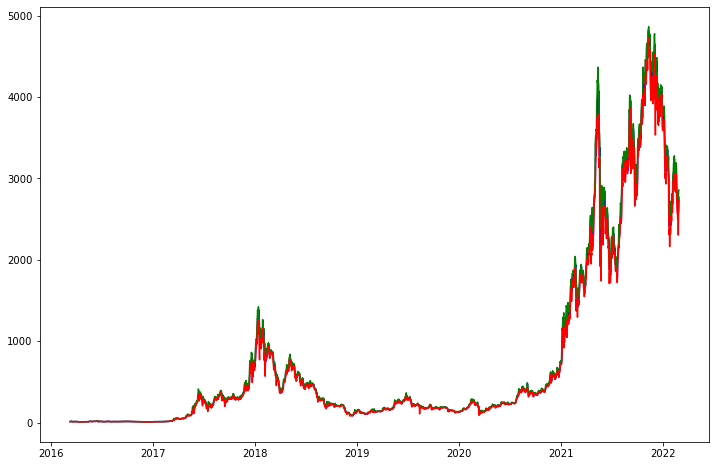

In [21]:
plt.figure(figsize=(12, 8))
plt.plot(df['Open'], color='blue')
plt.plot(df['High'], color='green')
plt.plot(df['Low'], color='red')

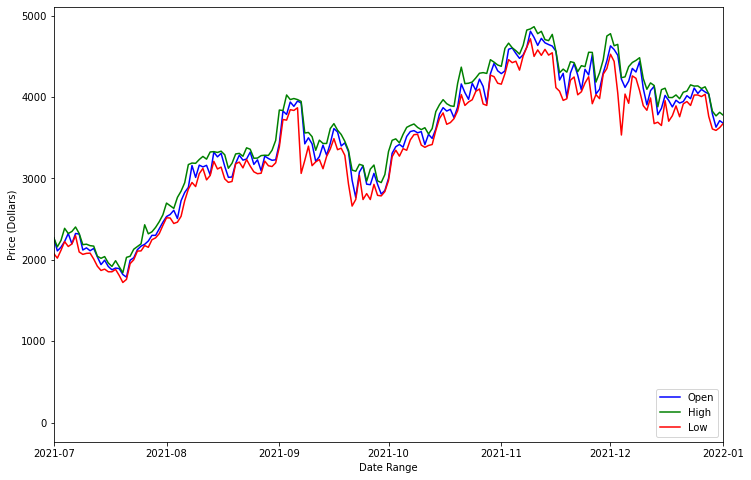

In [22]:
plt.figure(figsize=(12, 8))
plt.plot(df['Open'], color='blue', label="Open")
plt.plot(df['High'], color='green', label="High")
plt.plot(df['Low'], color='red', label="Low")
plt.xlim(datetime.date(2021, 7, 1), datetime.date(2022, 1, 1))
plt.xlabel("Date Range")
plt.ylabel("Price (Dollars)")
plt.legend(loc="lower right")

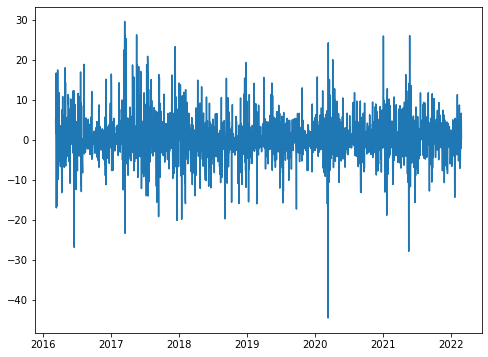

In [23]:
plt.figure(figsize=(8, 6))
plt.plot(df['Change %'])

<AxesSubplot:xlabel='Date'>

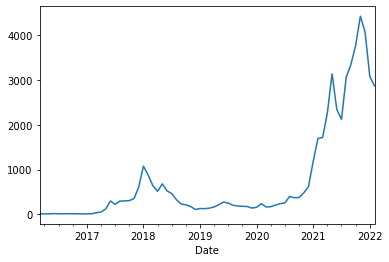

In [24]:
# Monthly Data plotting
monthly_df.plot()

Text(0, 0.5, 'Open cost')

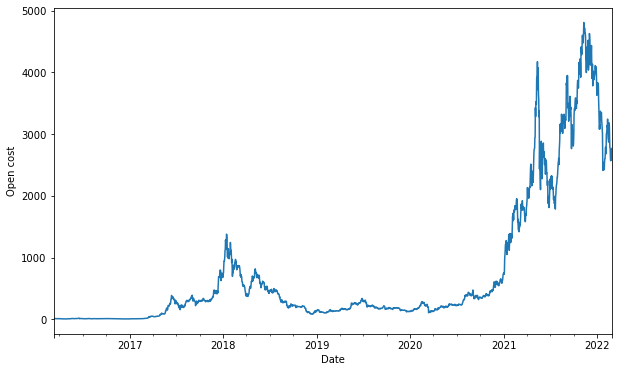

In [25]:
plt.figure(figsize=(10, 6))
df['Open'].plot()
plt.ylabel('Open cost')

Is this data stationary? (means mean, variance and covariance is constant over time.)

In [26]:
from statsmodels.tsa.seasonal import seasonal_decompose

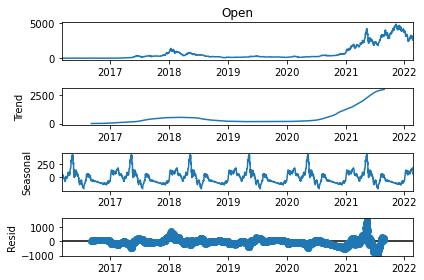

In [27]:
decomposition = seasonal_decompose(df['Open'], model='additive', period=365)
fig = decomposition.plot()
plt.show()

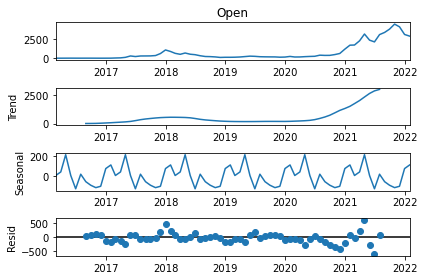

In [28]:
decomposition = seasonal_decompose(monthly_df, model='additive')
fig = decomposition.plot()
plt.show()

### To check if data is stationary

In [21]:
from statsmodels.tsa.stattools import adfuller

In [22]:
# h0: It is non stationary
# h1: It is stationary

def adfuller_test(data):
    result = adfuller(data)
    labels = ['ADF Test Statistic', 'p-value', '#Lags Used', 'Number of observations Used']
    for value, label in zip(result, labels):
        print(label+" : "+str(value))
    if result[1] <= 0.05:
        print("String evidence against the null hypothesis(h0), reject the null hypothesis. Data has no unit root and is stationary.")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary.")

In [23]:
adfuller_test(df['Open'])

ADF Test Statistic : -0.6662591838129458
p-value : 0.855296698193562
#Lags Used : 17
Number of observations Used : 2162
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary.


In [24]:
adfuller_test(monthly_df)

ADF Test Statistic : -2.4369312155069016
p-value : 0.131582933938798
#Lags Used : 9
Number of observations Used : 62
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary.


## Making Stationary

In [33]:
p_values = []
for i in range(1, 62):
    tdf = df['Open'].diff(periods=i)
    res = adfuller(tdf.dropna())
    p_values.append([i, res[1]])
p_values.sort(key = lambda x: x[1])
p_values[:10]

[[1, 4.681225357617667e-22],
 [27, 9.156466171739951e-18],
 [28, 1.4750988162069713e-16],
 [29, 1.8269636081275126e-15],
 [30, 1.6125750930816086e-14],
 [31, 4.682164629806114e-14],
 [3, 2.1853226650522645e-13],
 [32, 4.4794325057785787e-13],
 [33, 1.6398705983609365e-12],
 [4, 3.6319616848893667e-12]]

In [25]:
rate_diff = df['Open'].diff(periods=27)
rate_diff.dropna(inplace=True)

In [26]:
rate_diff

Date
2016-04-06     -0.80
2016-04-07     -0.99
2016-04-08     -1.90
2016-04-09     -3.23
2016-04-10     -5.92
               ...  
2022-02-22    111.12
2022-02-23    175.13
2022-02-24    153.88
2022-02-25     50.57
2022-02-26    167.46
Name: Open, Length: 2153, dtype: float64

In [36]:
adfuller_test(rate_diff)

ADF Test Statistic : -10.126417989884205
p-value : 9.156466171739951e-18
#Lags Used : 26
Number of observations Used : 2126
String evidence against the null hypothesis(h0), reject the null hypothesis. Data has no unit root and is stationary.


<AxesSubplot:xlabel='Date'>

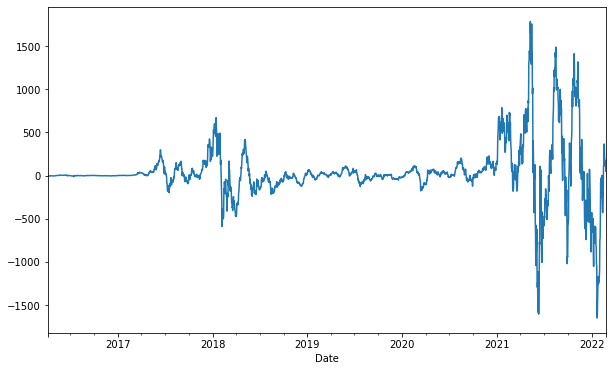

In [37]:
plt.figure(figsize=(10, 6))
rate_diff.plot()

Monthly data

In [38]:
p_values = []
for i in range(1, 12):
    tdf = monthly_df.diff(periods=i)
    res = adfuller(tdf.dropna())
    p_values.append([i, res[1]])
p_values.sort(key = lambda x: x[1])
p_values

[[9, 0.003405117750309404],
 [2, 0.02424998207084171],
 [4, 0.026705645814035027],
 [6, 0.06515747852513266],
 [7, 0.06617839368934689],
 [8, 0.06728861445870056],
 [3, 0.07738468363606771],
 [11, 0.1949285096647994],
 [1, 0.20244674490412473],
 [10, 0.5212717294610526],
 [5, 0.5767682296687643]]

In [27]:
seasonal_monthly_df = monthly_df.diff(periods=9)

In [28]:
seasonal_monthly_df

Date
2016-03-01            NaN
2016-04-01            NaN
2016-05-01            NaN
2016-06-01            NaN
2016-07-01            NaN
                 ...     
2021-10-01    2592.798710
2021-11-01    2733.930286
2021-12-01    2359.718065
2022-01-01     819.944280
2022-02-01    -271.101253
Freq: MS, Name: Open, Length: 72, dtype: float64

In [41]:
adfuller_test(seasonal_monthly_df.dropna())

ADF Test Statistic : -3.754802151211026
p-value : 0.003405117750309404
#Lags Used : 7
Number of observations Used : 55
String evidence against the null hypothesis(h0), reject the null hypothesis. Data has no unit root and is stationary.


<AxesSubplot:xlabel='Date'>

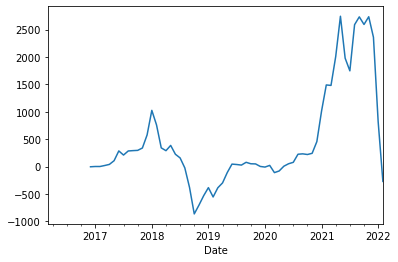

In [42]:
seasonal_monthly_df.plot()

## Visulizing PACF and ACF Plots

In [43]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

C:\Users\nihal\Anaconda3\envs\MLProjects\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


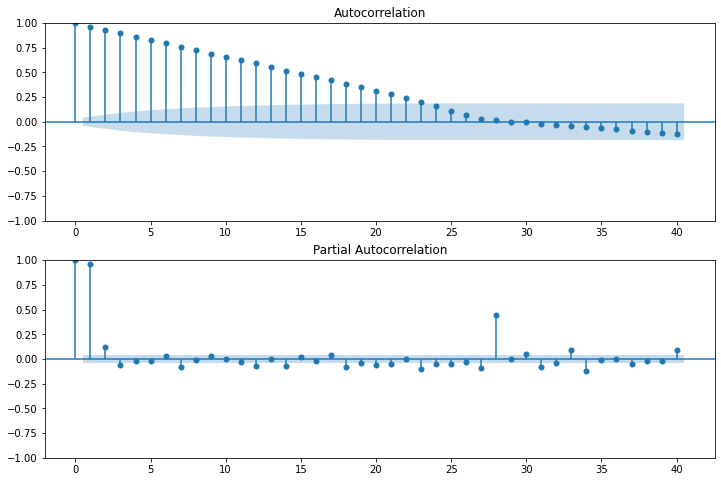

In [44]:
fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(211)
fig = plot_acf(rate_diff.dropna(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(rate_diff.dropna(), lags=40, ax=ax2)

AR value must be 2 (p). q will be 0

C:\Users\nihal\Anaconda3\envs\MLProjects\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


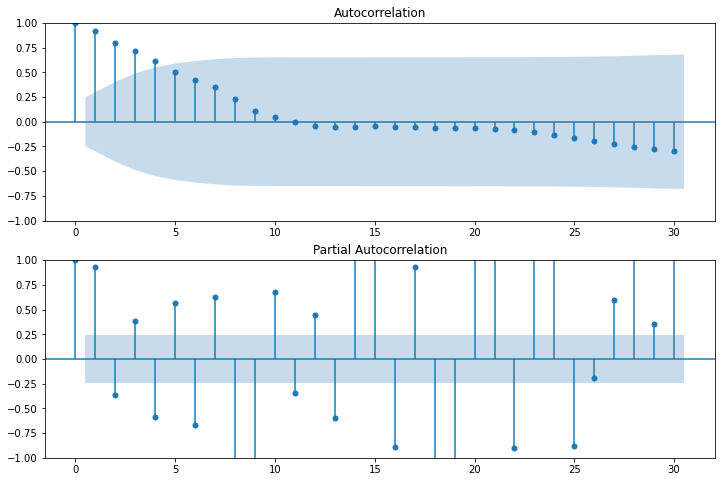

In [45]:
fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(211)
fig = plot_acf(seasonal_monthly_df.dropna(), lags=30, ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(seasonal_monthly_df.dropna(), lags=30, ax=ax2)

AR value must be 2 (p). q will be 0

## Modeling

In [29]:
# Spliting the data into training and testing
X = df['Open']
print("Total Length of data:",len(X))
print("93% of data will be:", len(X)*0.93)
train_limit = int(len(X)*0.93)

Total Length of data: 2180
93% of data will be: 2027.4


In [30]:
train_x = X[:train_limit]
test_x = X[train_limit:]

In [31]:
test_x

Date
2021-09-27    3061.86
2021-09-28    2926.04
2021-09-29    2807.15
2021-09-30    2851.06
2021-10-01    2999.86
               ...   
2022-02-22    2569.19
2022-02-23    2637.38
2022-02-24    2578.54
2022-02-25    2596.52
2022-02-26    2767.58
Name: Open, Length: 153, dtype: float64

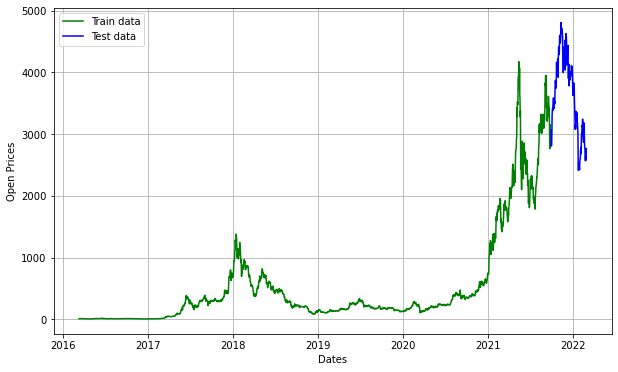

In [32]:
plt.figure(figsize=(10, 6))
plt.grid(True)
plt.xlabel("Dates")
plt.ylabel("Open Prices")
plt.plot(train_x, 'green', label='Train data')
plt.plot(test_x, 'blue', label='Test data')
plt.legend()

##  ARIMA Model

In [38]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [53]:
model_arima = ARIMA(train_x, order=(4, 1, 0))
model_arima_fit = model_arima.fit()

C:\Users\nihal\Anaconda3\envs\MLProjects\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\nihal\Anaconda3\envs\MLProjects\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\nihal\Anaconda3\envs\MLProjects\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


In [54]:
arima_pred = model_arima_fit.predict(start=train_limit, end=len(X)-1)

In [55]:
arima_pred_df = pd.DataFrame(arima_pred)
arima_pred_df = arima_pred_df.set_index(test_x.index)
arima_pred_df

,predicted_mean
Date,
2021-09-27,2936.285899
2021-09-28,2930.696954
2021-09-29,2913.892501
2021-09-30,2915.523576
2021-10-01,2915.058496
...,...
2022-02-22,2912.609947
2022-02-23,2912.609947
2022-02-24,2912.609947


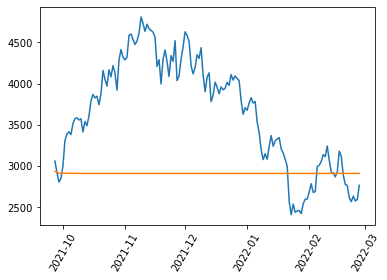

In [56]:
plt.plot(test_x)
plt.plot(arima_pred_df)
plt.xticks(rotation=60)
# plt.xlim(datetime.date(2021, 1, 1), datetime.date(2021, 5, 1))
plt.show()

As we can see that it does not do a good job as it is a very basic model and does not have seasonality involved.

In [33]:
monthly_df

Date
2016-03-01      11.731364
2016-04-01       9.033333
2016-05-01      11.184839
2016-06-01      14.416667
2016-07-01      11.891935
                 ...     
2021-10-01    3775.876774
2021-11-01    4429.586000
2021-12-01    4076.529355
2022-01-01    3084.661613
2022-02-01    2870.724231
Freq: MS, Name: Open, Length: 72, dtype: float64

In [34]:
monthly_train_len = len(monthly_df)*0.9
monthly_train_len

64.8

In [35]:
monthly_df.index[64]

Timestamp('2021-07-01 00:00:00', freq='MS')

In [36]:
train_monthly = monthly_df[:int(monthly_train_len)]
test_monthly = monthly_df[int(monthly_train_len):]

In [40]:
model_monthly = ARIMA(train_monthly, order=(4, 1, 0))
model_arima_fit = model_monthly.fit()

In [ ]:
arima_pred_monthly = model_arima_fit.predict(start=int(monthly_train_len), end=len(monthly_df)-1)

In [63]:
arima_pred_monthly_df = pd.DataFrame(arima_pred_monthly)
arima_pred_monthly_df.set_index(test_monthly.index, inplace=True)
arima_pred_monthly_df

,predicted_mean
Date,
2021-07-01,9.862754
2021-08-01,10.094598
2021-09-01,10.582500
2021-10-01,10.375883
2021-11-01,10.048998
2021-12-01,11.029761
2022-01-01,12.190986
2022-02-01,13.379779


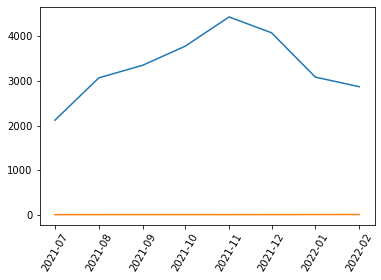

In [64]:
plt.plot(test_monthly)
plt.plot(arima_pred_monthly_df)
plt.xticks(rotation=60)
# plt.xlim(datetime.date(2016, 5, 13), datetime.date(2016, 5, 20))
plt.show()

## ARIMA Model with updating train with current data

In [66]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [67]:
training_data = list(train_x)
testing_data = list(test_x)

In [68]:
model_predictions = []
n_test_obser = len(testing_data)

In [70]:
for i in range(n_test_obser):
    model = ARIMA(training_data, order = (4,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    model_predictions.append(yhat)
    actual_test_value = testing_data[i]
    training_data.append(actual_test_value)

In [71]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 2179
Model:                 ARIMA(4, 1, 0)   Log Likelihood              -12256.607
Date:                Sun, 10 Apr 2022   AIC                          24523.215
Time:                        13:11:35   BIC                          24551.645
Sample:                             0   HQIC                         24533.609
                               - 2179                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0831      0.009     -9.006      0.000      -0.101      -0.065
ar.L2          0.0129      0.008      1.537      0.124      -0.004       0.029
ar.L3          0.0129      0.009      1.484      0.1

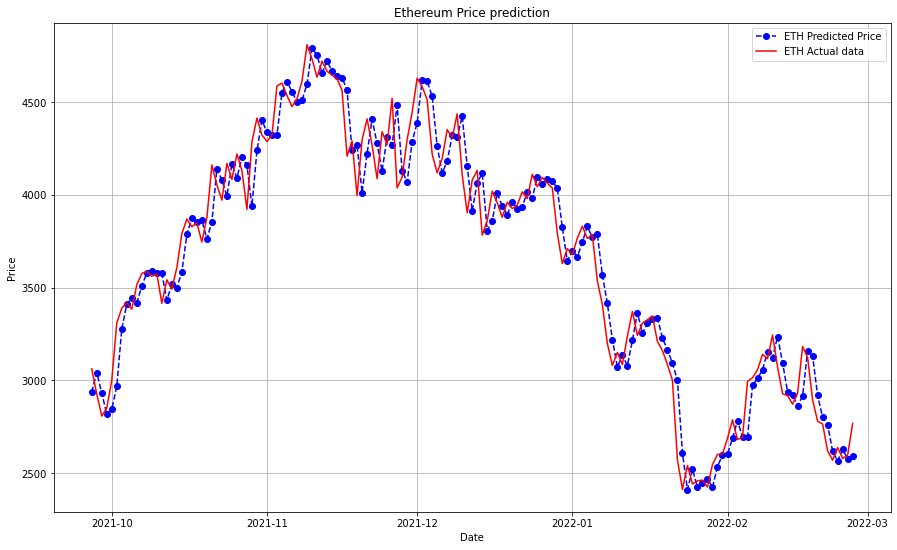

In [72]:
plt.figure(figsize=(15, 9))
plt.grid()

date_range = df[train_limit:].index
plt.plot(date_range, model_predictions, color='blue', marker='o', linestyle='dashed', label="ETH Predicted Price")
plt.plot(date_range, testing_data, color='red', label='ETH Actual data')

plt.title('Ethereum Price prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [73]:
# Mean absolute percentage error
mape = np.mean(np.abs(np.array(model_predictions) - np.array(testing_data))/np.abs(testing_data))
print("MAPE:", mape)

MAPE: 0.032203415561307555


In [74]:
mean_squared_error(testing_data, model_predictions)

21966.766999732805

In [75]:
np.mean(testing_data)

3648.5073202614385

## SARIMA

In [41]:
import statsmodels.api as sm

From above:  
AR value must be 2 (p). q will be 0. d = 1, season = 27  
AR value must be 2 (p). q will be 0. d = 1, season = 9

In [42]:
sarima_model_daily = sm.tsa.statespace.SARIMAX(train_x, order=(2, 1, 0), seasonal_order=(2, 1, 0, 27))
result_daily = sarima_model_daily.fit()

C:\Users\nihal\Anaconda3\envs\MLProjects\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\nihal\Anaconda3\envs\MLProjects\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


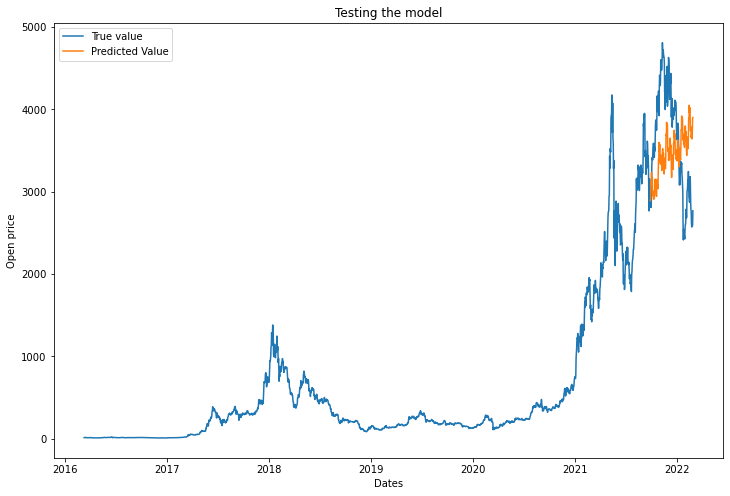

In [43]:
plt.figure(figsize=(12, 8))
daily_prediction = result_daily.predict(start=train_limit, end=len(X)-1)
plt.plot(X.index, X, label="True value")
plt.plot(daily_prediction, label="Predicted Value")
plt.xlabel("Dates")
plt.ylabel("Open price")
plt.title("Testing the model")
plt.legend()

In [47]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [44]:
daily_prediction

2021-09-27    2890.643417
2021-09-28    2936.817742
2021-09-29    3110.799899
2021-09-30    3098.966360
2021-10-01    3233.484783
                 ...     
2022-02-22    3705.780923
2022-02-23    3639.479880
2022-02-24    3721.878354
2022-02-25    3884.534375
2022-02-26    3900.313824
Freq: D, Name: predicted_mean, Length: 153, dtype: float64

In [45]:
X[train_limit:]

Date
2021-09-27    3061.86
2021-09-28    2926.04
2021-09-29    2807.15
2021-09-30    2851.06
2021-10-01    2999.86
               ...   
2022-02-22    2569.19
2022-02-23    2637.38
2022-02-24    2578.54
2022-02-25    2596.52
2022-02-26    2767.58
Name: Open, Length: 153, dtype: float64

In [51]:
print("Mean of target value:", X[train_limit:].mean())
print("Mean Absolute error:", mean_absolute_error(X[train_limit:], daily_prediction))
print("Root mean squared error:", np.sqrt(mean_squared_error(X[train_limit:], daily_prediction)))

Mean of target value: 3648.507320261437
Mean Absolute error: 717.9438053694188
Root mean squared error: 799.7607246362991


In [79]:
sarima_model_daily = sm.tsa.statespace.SARIMAX(df['Open'], order=(2, 1, 0), seasonal_order=(2, 1, 0, 27))
result_daily = sarima_model_daily.fit()

C:\Users\nihal\Anaconda3\envs\MLProjects\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\nihal\Anaconda3\envs\MLProjects\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


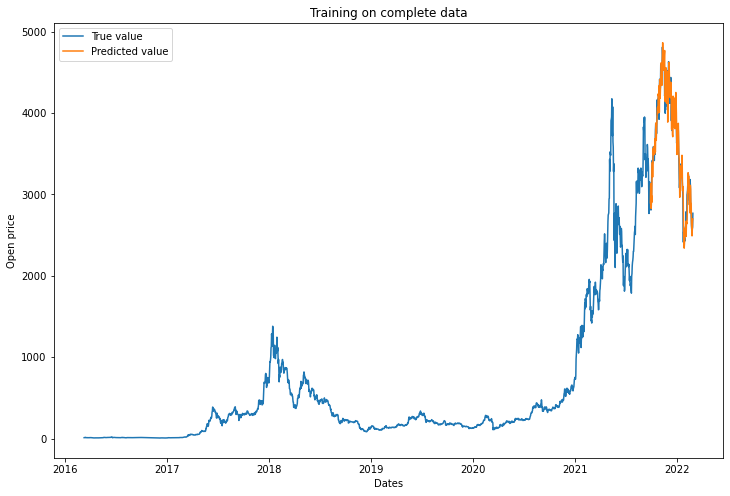

In [80]:
plt.figure(figsize=(12, 8))
daily_prediction = result_daily.predict(start=train_limit, end=len(X)-1)
plt.plot(X.index, X, label="True value")
plt.plot(daily_prediction, label="Predicted value")
plt.xlabel("Dates")
plt.ylabel("Open price")
plt.title("Training on complete data")
plt.legend()

In [53]:
X_monthly = monthly_df
print("Total Length of data:",len(X_monthly))
print("90% of data will be:", len(X_monthly)*0.9)
train_limit_monthly = int(len(X_monthly)*0.9)

Total Length of data: 72
90% of data will be: 64.8


In [54]:
train_x_monthly = X_monthly[:train_limit_monthly]
test_x_monthly = X_monthly[train_limit_monthly:]

In [55]:
sarima_model_monthly = sm.tsa.statespace.SARIMAX(train_x_monthly, order=(2, 1, 0), seasonal_order=(1, 1, 0, 9))
result_monthly = sarima_model_monthly.fit()

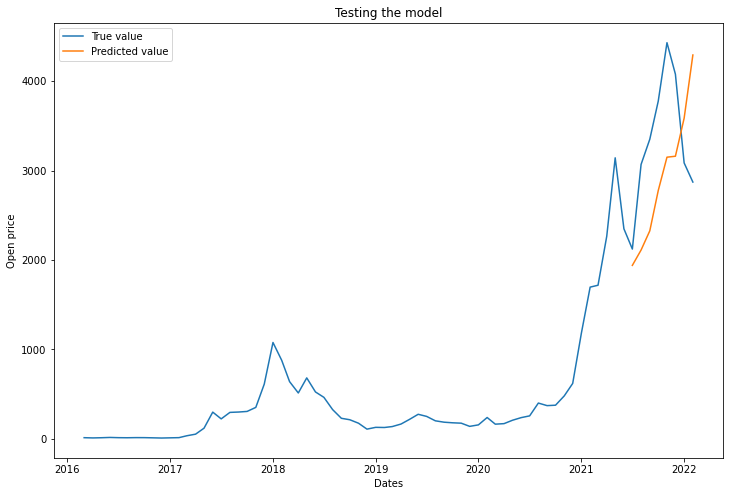

In [56]:
plt.figure(figsize=(12, 8))
monthly_prediction = result_monthly.predict(start=train_limit_monthly, end=len(X_monthly)-1)
plt.plot(X_monthly.index, X_monthly, label="True value")
plt.plot(monthly_prediction, label="Predicted value")
plt.xlabel("Dates")
plt.ylabel("Open price")
plt.title("Testing the model")
plt.legend()

In [58]:
test_x_monthly

Date
2021-07-01    2121.492581
2021-08-01    3068.073226
2021-09-01    3350.157333
2021-10-01    3775.876774
2021-11-01    4429.586000
2021-12-01    4076.529355
2022-01-01    3084.661613
2022-02-01    2870.724231
Freq: MS, Name: Open, dtype: float64

In [59]:
monthly_prediction

2021-07-01    1939.023603
2021-08-01    2110.612644
2021-09-01    2325.698254
2021-10-01    2775.895172
2021-11-01    3148.908559
2021-12-01    3159.638931
2022-01-01    3585.169313
2022-02-01    4291.969736
Freq: MS, Name: predicted_mean, dtype: float64

In [57]:
print("Mean of target value:", test_x_monthly.mean())
print("Mean Absolute error:", mean_absolute_error(test_x_monthly, monthly_prediction))
print("Root mean squared error:", np.sqrt(mean_squared_error(test_x_monthly, monthly_prediction)))

Mean of target value: 3347.1376390612077
Mean Absolute error: 910.4614139373942
Root mean squared error: 984.3001832025407


In [85]:
sarima_model_monthly = sm.tsa.statespace.SARIMAX(monthly_df, order=(2, 1, 0), seasonal_order=(1, 1, 0, 9))
result_monthly = sarima_model_monthly.fit()

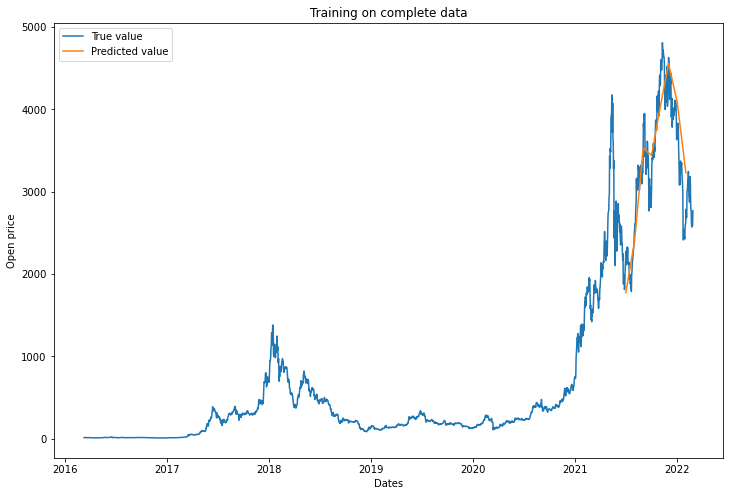

In [86]:
plt.figure(figsize=(12, 8))
monthly_prediction = result_monthly.predict(start=train_limit_monthly, end=len(X_monthly)-1)
plt.plot(X.index, X, label="True value")
plt.plot(monthly_prediction, label="Predicted value")
plt.xlabel("Dates")
plt.ylabel("Open price")
plt.title("Training on complete data")
plt.legend()

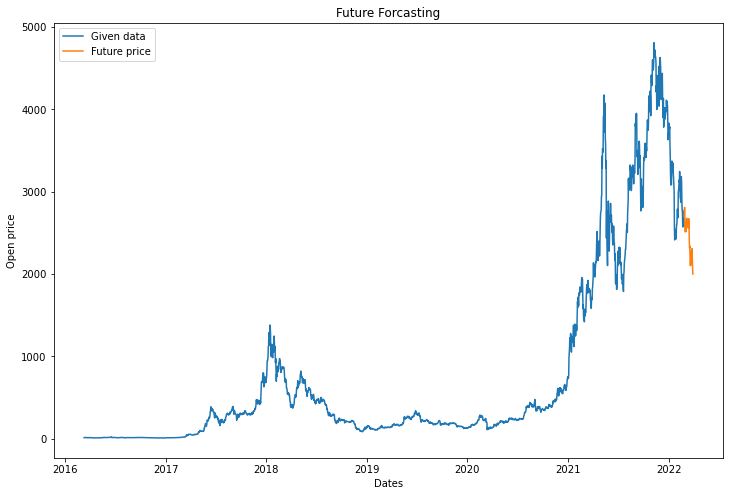

In [87]:
plt.figure(figsize=(12, 8))
future_pred = result_daily.predict(start=len(X)-1, end=len(X)+31)
plt.plot(X.index, X, label="Given data")
plt.plot(future_pred, label="Future price")
plt.xlabel("Dates")
plt.ylabel("Open price")
plt.title("Future Forcasting")
plt.legend()

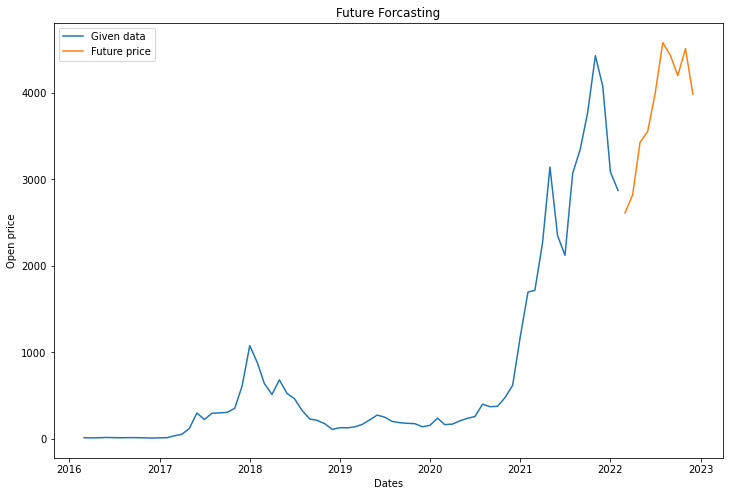

In [88]:
plt.figure(figsize=(12, 8))
future_pred_monthly = result_monthly.predict(start=len(X_monthly), end=len(X_monthly)+9)
plt.plot(X_monthly.index, X_monthly, label="Given data")
plt.plot(future_pred_monthly, label="Future price")
plt.xlabel("Dates")
plt.ylabel("Open price")
plt.title("Future Forcasting")
plt.legend()

## Pickling The Models

In [89]:
import pickle

In [90]:
daily_model_path = '../models/ethereum_daily.pkl'
pickle.dump(result_daily, open(daily_model_path, 'wb'))

In [91]:
monthly_model_path = '../models/ethereum_monthly.pkl'
pickle.dump(result_monthly, open(monthly_model_path, 'wb'))